In [1]:
import matplotlib.pyplot as plt
import math
import time
import numpy as np
import random

In [9]:
class Calc:
    
    def __init__(self) -> None:
        self.width = 40
        self.height = 40
        self.debutX = 0
        self.angle = 0
        self.coef = 0
        self.b = 0
        self.coord = []
        self.cosAngle = 0.5
        self.epsilon = 1e-5
        # self.asc = True
        
        self.InitialValues()
        
    """
        set random angle and random X at beginning
    """
    def InitialValues(self):
        self.debutX = random.randint(10, self.width-10)
        self.angle = random.randint(10, 80)
        
        
    """
        méthode à peaufiner : 
        TODO : enregistrer la valeur de x, y en fonction du rebond ou non
    """
    def toY(self, st, direction):
        if direction == "NE":
            print(st, "pas de rebond" if self.coef*self.width + self.b >= self.height else" rebond")
        if direction == "NW":
            print(st, "pas de rebond" if self.b >= self.height else "rebond")
        if direction == "SE":
            print(st,  "pas de rebond" if self.coef*self.width + self.b <= 0 else "rebond")
        if direction == "SW":
            print(st, "pas de rebond" if self.b <= 0 else "rebond")
        print(self.angle)
            
    def checkDivZero(self, denominateur):
        return denominateur if denominateur != 0 else denominateur * self.epsilon
    

    def modifiyAngle(self):
        # modification aléatoire de la valeur de l'angle
        alea = random.randint(0, 8)
        # pour additioner ou soustraire
        alea2 = random.randint(0, 1)
        
        if self.angle >= 80:
            self.angle = self.angle - alea
        elif self.angle <= 10:
            self.angle = self.angle + alea
        else:
            if alea2 == 0:
                self.angle = self.angle - alea 
            else:
                self.angle = self.angle + alea
        
        # recalcul du cosinus
        self.cosAngle = math.cos(math.radians(self.angle))


        
        
    def fromZeroToRight(self) -> None:
        self.modifiyAngle()
        # calcul hypothénuse
        hypo = self.width/self.checkDivZero(self.cosAngle)
        # pythagore
        coteOpp = math.sqrt(abs(hypo**2 - self.width**2))
        # coefficient directeur ascendant
        self.coef = math.tan(math.radians(self.angle))
        # thalès
        self.b = self.debutX * coteOpp / self.width
        if (self.debutX > 0):
            self.b = -self.b
            
        self.toY("from zero to right", "NE")
        self.coord =  [self.width, self.width * self.coef + self.b]
        print(self.coord)
        
        
            
    def fromZeroToLeft(self) -> None:
        self.modifiyAngle()
        hypo = self.width/self.checkDivZero(self.cosAngle)
        # pythagore
        coteOpp = math.sqrt(hypo**2 - self.width**2)
        # coeff directeur négatif
        self.coef = -math.tan(math.radians(self.angle))
        self.b = self.debutX * coteOpp / self.width
        # thalès
        ca = (self.width + self.debutX) * coteOpp /self.width
        self.b = ca - coteOpp 
        
        self.toY("from zero to left", "NW")
        self.coord = [0, self.b]
        print(self.coord)
        

    def fromTopToRight(self) -> None:
        self.modifiyAngle()
        # angle inversé !
        cosAng = math.cos(math.radians(90-self.angle))
        # coefficient négatif
        self.coef = -math.tan(math.radians(self.angle))
        # calcul hypothénuse
        oz = self.height / self.checkDivZero(cosAng)
        # calcul base
        xz = math.sqrt(abs(oz**2 - self.height**2))
        # calcul absisse totale
        az = xz + self.debutX 
        # thalès
        self.b = az * self.height / self.checkDivZero(xz) 
        
        self.toY("from top to right", "SE")
        self.coord = [self.width, self.coef*self.width + self.b]
        print(self.coord)
        
        
    def fromTopToLeft(self): 
        self.modifiyAngle()
        self.coef = math.tan(math.radians(self.angle))
        # hypothénuse
        bo = self.debutX / self.checkDivZero(self.cosAngle)
        # base
        co = math.sqrt(abs(bo**2 - self.debutX**2))
        # thalès
        self.b = self.height - co
        
        self.toY("from top to left", "SW")
        self.coord = [0, self.b]
        print(self.coord)
        
        
        
    def plot_test_zero_to_right(self):
        x = np.linspace(self.debutX, self.width+20, 100)
        y = [self.coef*s+self.b for s in x]
        plt.plot(x, y)
        plt.plot([0, 0], [-10, 50])
        plt.plot([-30, 70], [0, 0])
        plt.plot([40,40], [-20, 50])
        plt.plot([0, 40], [40, 40])
        
    def plot_test_zero_to_left(self):
        x = np.linspace(self.debutX, 0-20, 100)
        y = [self.coef*s+self.b for s in x]
        plt.plot(x, y)
        plt.plot([0, 0], [-10, 50])
        plt.plot([-30, 70], [0, 0])
        plt.plot([40,40], [-20, 50])
        plt.plot([0, 40], [40, 40])
        
    def test_zero_to_right(self):
        self.fromZeroToRight()
        self.plot_test_zero_to_right()   
        
    def test_zero_to_left(self):
        self.fromZeroToLeft()
        self.plot_test_zero_to_left()
        
    def test_top_to_right(self):
        self.fromTopToRight()
        self.plot_test_zero_to_right()
        
    def test_top_to_left(self): # à revoir
        self.fromTopToLeft()
        self.plot_test_zero_to_left()
        
    def setAsc(self) -> None:
        if (self.asc):
            self.asc = False
        else:
            self.asc = True 

from zero to right  rebond
26
[40, 5.36505847422448]
from zero to left rebond
34
[0, 19.560746988430367]
from top to left rebond
42
[0, 13.888282715362642]
from top to right rebond
47
[40, 28.20394418972848]
71.09869259071579
47
29
39.999999999999986


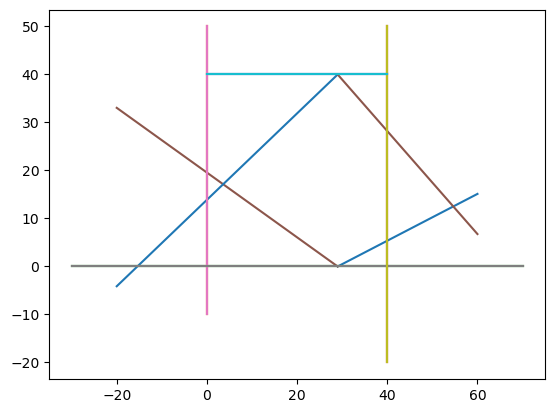

In [67]:
cl = Calc()
cl.test_zero_to_right()
cl.test_zero_to_left()
cl.test_top_to_left()
cl.test_top_to_right()
print(cl.b)
print(cl.angle)
print(cl.debutX)
print(cl.debutX*cl.coef + cl.b)